# Machine Learning (ML)



## What is Machine Learning?
* A subset of Artificial Intelligence that aims at giving the computer the ability to learn from data without being explicitly shown (programmed) how to do that.

<!-- ![ML_DL.png](https://drive.google.com/uc?export=view&id=1VLOv0I5vLx8M8BWrgmy090cVzB78JYJz) -->

![ML_DL.png](Figures/ML_DL.png)

A ML model is able to _gradually improve its performance_, by repeating a specific process, without being re-developed to do so.


## Purpose
It's purpose is to create machines that are capable of: 
* learning, 
* improve their perfomance in specific areas,
* via the use of earlier knowledge and experience.

By experience we mean the __data__, the __measurements__ we may have, and the __observations__. 

## Machine Learning types
* __Supervised learning__: A ML model is trained over data that have labels. Typical supervised learning problems regard: 
    - __Classification__: Classify input data to pre-defined classes. E.g.classify clothing into t-shirts, boots, shorts, etc.
    - __Regression__: Identify a numerical relationship between the input and the output data. E.g., Predict the temperature of a city based on historical data, etc.
* __Unsupervised learning__: A ML model aims at learning patterns from unlabeled data. Typical unsupervised learning problems regard: 
    - __Clustering__: A ML model needs to divide the input data into a number of groups (aka. clusters). E.g., group users based on their location 
* __Semi-supervised learning__: A hybrid problem, where a ML model needs to combine a small number of labeled data with a large number of unlabeled data. 
* __Re-inforcement learning__: An (intelligent) agent works its way around an environment and aims at maiximinz a cumulative reward. E.g., a self-driving car, or a chess playing agent.


## Machine Learning algorithms
For each problem, there exist several algorithms. For instance: 
* For __classification problems__, we may use a binary classifier two split the data into two classes, or a multi-class classifier if there exist several classes. Such algorithms include, Logistic Regression, Support Vector Machines, Decision Trees, Random Forests, etc.
* For __clustering problems__, the algorithms include DBSCAN, K-Means, K-Medoids, Hierarchical clustering, etc.

# Deep Learning (DL)
It is a type of Machine Learning, based on Artificial Neural Networks, that imitates the way humans earn knowledge. It can be used for solving supervised, semi-supervised and unsupervised learning problems. 

<!-- ![Deep_Learning_Network.png](https://drive.google.com/uc?export=view&id=1ZmPCmATnNJC4j-AL_yDNT0b6bS1S5gxb) -->

![Deep_Learning_Network.png](Figures/deep_learning_network.png)

A DL network is in fact, a large Neural Network, that consists of neurons that are interconnected through layers. There exist 3 categories of layers: 
1. the input layer where the input data are inserted in the networkm,
2. the hidden layers, that are between the input and output layers, whose neurons receive inputs and produce outputs given an activation function(this is where the magic happens),
3. the output layer, which is the final layer of a (Deep) Neural Network, where the predictions are obtained.

There exist several types (aka architectures or classes) of DNN such as: 
- Convolutional Neural Networks (this is what we will use today)
- Recurrent Neural Networks
- Self-organizing Maps
- Auto-encoders, etc.

<!-- <img src="https://drive.google.com/uc?export=view&id=10_1IkpeWhXEITOQ-qKg0Uklx9oPse_Qi" width="800" height="500" /> -->

<img src="Figures/dnn_architectures.png" width="800" height="500" />

<sup>*Image taken from [IBM Developer](https://developer.ibm.com/articles/cc-machine-learning-deep-learning-architectures/).*</sup>

## Activation functions
An activation function  transforms the input of a hidden layer into an output. This output is then forwarded to the next layer as input. 

<!-- ![neuron_af.png](https://drive.google.com/uc?export=view&id=1blx6VWrpj0bidldQpKvwwaz6NKiTov4C) -->

![neuron_af.png](Figures/neuron.png)

Where: 
- $x_i$ are the input data 
- $w_i$ the weight of each input 
- $β$ is the bias
- $f$ is the activation function

## Convolutional Neural Networks
Most commonly used for analyzing images. Such networks, work their way towards their prediction by gradually identifying features (from low level to higher level ones), as shown in the figure below:

<!-- ![cnn_features.png](https://drive.google.com/uc?export=view&id=1HitX7S_merVQJgtAxj6-aSPW5QMazkxq) -->

![cnn_features.png](Figures/cnn_features.png)


# Practical example
So that is enough with the theoretical stuff (for now). It's time to actually develop, train, and validate our own DL model. 

What we will do today, is create a _CNN model_ that will be trained using the __[Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist)__ data set, which consists of: 
- $60,000$ examples for training, and  
- $10,000$ examples for testing 

Our goal is to train that model in order to successfully predict the class of an object in an image. The available classes are the following: 
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

Each image is in grayscale and a dimension of $28\times28$ pixels, for a total of $784$ pixels. Each pixel has an integer value in the range of $[0,255]$.

## Installing dependencies

**Note:** whenever a command starts with `!`, it is ran on the terminal of the VM.

In [ ]:
!pip install tensorflow

## Import TensorFlow and other helper libraries

In [ ]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

# Verify that TensorFlow is properly imported, by checking the version
tf.__version__

'2.8.2'

## Import Fashion MNIST data set from the TensorFlow Data sets collection

In [ ]:
import tensorflow_datasets as tfds

dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [84]:
# Split dataset to train and test sets
train_dataset, test_dataset = dataset['train'], dataset['test']

## Data information 

In [85]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


### Assign names to each class 
Currently we have class numbers $[0,9]$

In [86]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

### Data visualization

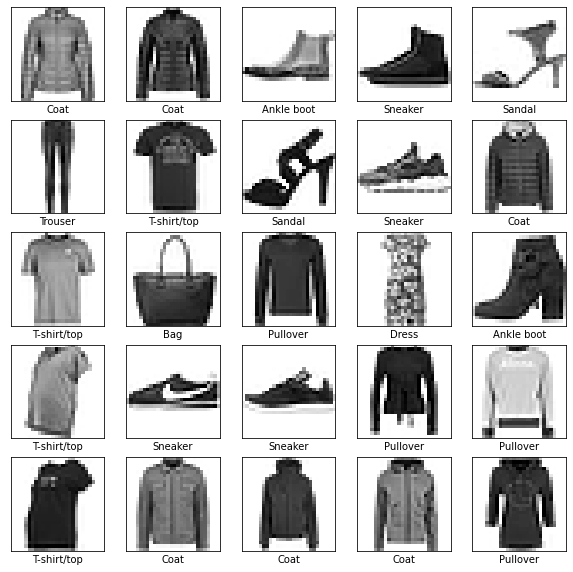

In [87]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

## Data preprocessing

### Data normalization

Useful since: 
* We avoid redundancy on the data
* Ensure similarity across data 
* Rescale data so that everything is within a known range

Usually required when data are in different ranges (i.e., when we have data regarding age where the range is $[0, 100]$ and salary where the range is $[5000,~200.000]$

In [88]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32) # type casting Tensor (i.e., multi-dimensional array of elements) as tf.float32
  images /= 255 # normalization so that everything will be in the same [0, 1] range
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

print(train_dataset)

<CacheDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


## Building the model

In [89]:
model = tf.keras.Sequential([
    #  A convolutional layer that applies 32 filters with a kernel size of `3x3`
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    # A MaxPooling layer for 2D data that downsamples the input data 
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    # Flattens the input data. e.g., if we have a 2d array with the following dimensions: [10, 10] it will converted into [1, 100]
    tf.keras.layers.Flatten(),
    # 128 units (i.e., neurons) / The Activation function is the ReLU
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    # 10 units (because there exist 10 classes) / The Activation function is the Softmax 
    # (frequently used in multinomial classification problems)
    # Calculates the probability of an input data to be classified in either one of each class
    # The sum of all probabilities is equal to 1. 
    # The object is classified to the class with the highest probability
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compile neural network

* Optimizer: Adjusts the inner parameters of the model in order to minimize the loss
* Loss (i.e., loss function): Measures how far away the predicted output is, from the desired output
* Metrics: We use accuracy in order to test how many of the test data are correctly classified

In [90]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Training the model 

In [91]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [92]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4123 - accuracy: 0.8477
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2567 - accuracy: 0.9053
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2091 - accuracy: 0.9235
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1742 - accuracy: 0.9369
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1477 - accuracy: 0.9458
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1278 - accuracy: 0.9530
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1058 - accuracy: 0.9612
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0916 - accuracy: 0.9662
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0751 - accuracy: 0.9729
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.066

## Evaluate model (accuracy metric)

In [93]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.4073 - accuracy: 0.9178
Accuracy on test dataset: 0.9178000092506409


## Make predictions 

In [94]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [95]:
predictions.shape

(32, 10)

In [96]:
# Get the class probabilities for the first image in the test_dataset
predictions[0]

array([3.9607104e-07, 4.8326900e-08, 3.8059824e-04, 1.2522589e-06,
       9.9588323e-01, 2.7645401e-08, 3.7310980e-03, 1.8159638e-07,
       9.3957715e-07, 2.2484580e-06], dtype=float32)

In [97]:
# Get the element with the maximum value (i.e., the class with the highest probability)
np.argmax(predictions[0])

4

In [98]:
# Get the actual class of the same image
test_labels[0]

4

### Plotting results 

In [99]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Additional predictions 

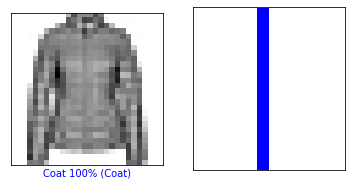

In [100]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

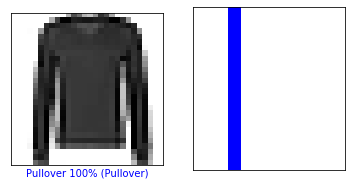

In [101]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

### Several predictions 

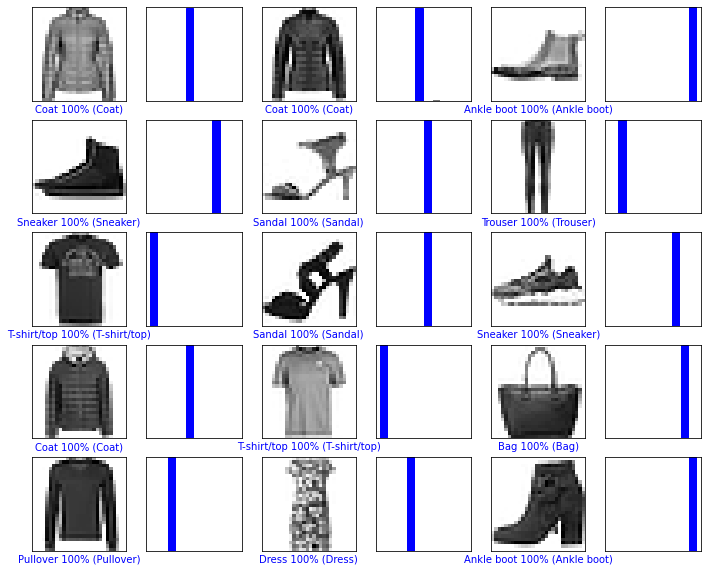

In [102]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

### Make a prediction using an image from the test set

In [ ]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

In [134]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [135]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.9607104e-07 4.8327085e-08 3.8059716e-04 1.2522625e-06 9.9588323e-01
  2.7645401e-08 3.7311211e-03 1.8159638e-07 9.3958073e-07 2.2484580e-06]]


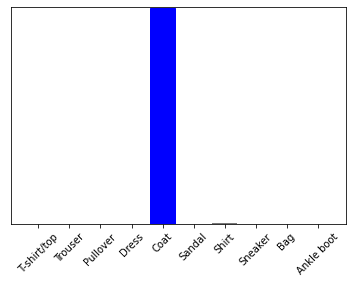

In [136]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [137]:
print("Predicted class: {}".format(class_names[np.argmax(predictions_single[0])]))
print("Actual class: {}".format(class_names[test_labels[0]]))

Predicted class: Coat
Actual class: Coat
